In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.2 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

model = YOLO("yolo26n.pt")

model.train(data='/content/drive/MyDrive/Capstone/SOD-SSS-5-YOLO/data.yaml', epochs = 100, imgsz = 640, batch = 16)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Capstone/SOD-SSS-5-YOLO/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, i

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7be3d7029340>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [4]:
metrics = model.val()

Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO26n summary (fused): 122 layers, 2,375,031 parameters, 0 gradients, 5.2 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 16.8±3.1 MB/s, size: 30.6 KB)
val: Scanning /content/drive/MyDrive/Capstone/SOD-SSS-5-YOLO/valid/labels.cache... 89 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 89/89 33.9Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 37, len(boxes) = 89. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.9it/s 3.1s
                   all         89         89      0.754      0.831      0.812      0.505
Speed: 5.8ms preprocess, 11.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /content/runs


image 1/1 /content/drive/MyDrive/Capstone/SOD-SSS-5-YOLO/test/images/10576_bmp.rf.412c5a4f442a327f68457056601c57ed.jpg: 640x640 1 Weapons, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


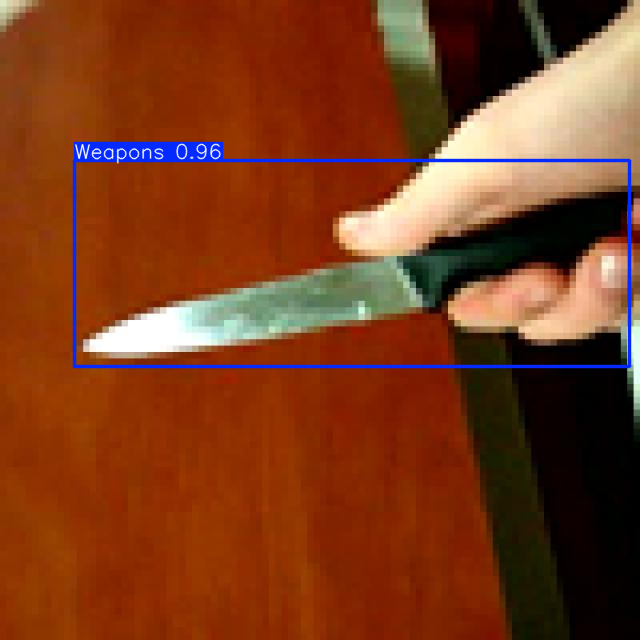

'results_10576_bmp.rf.412c5a4f442a327f68457056601c57ed.jpg'

In [10]:
results = model('/content/drive/MyDrive/Capstone/SOD-SSS-5-YOLO/test/images/10576_bmp.rf.412c5a4f442a327f68457056601c57ed.jpg')

results[0].show()
results[0].save()

In [11]:
import pandas as pd

model = YOLO("/content/runs/detect/train/weights/best.pt")

results = model.val(data="/content/drive/MyDrive/Capstone/SOD-SSS-5-YOLO/data.yaml")


precision = results.box.p  # list of precision scores per class
recall = results.box.r     # list of recall scores per class
f1_scores = results.box.f1 # list of F1 scores per class
maps = results.box.maps    # list of mAP per class
class_names = [model.names[i] for i in results.ap_class_index]

df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1': f1_scores,
    'mAP': maps
})

df.to_csv('metrics_per_class.csv', index=False)

Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO26n summary (fused): 122 layers, 2,375,031 parameters, 0 gradients, 5.2 GFLOPs
val: Fast image access ✅ (ping: 1.3±0.7 ms, read: 11.0±6.5 MB/s, size: 30.5 KB)
val: Scanning /content/drive/MyDrive/Capstone/SOD-SSS-5-YOLO/valid/labels.cache... 89 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 89/89 20.7Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 37, len(boxes) = 89. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 2.2it/s 2.8s
                   all         89         89      0.754      0.831      0.812      0.505
Speed: 7.8ms preprocess, 5.0ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /content/runs/